# 속성 데이터 분류 Template

# 데이터 준비

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
!wget https://raw.githubusercontent.com/dhrim/2022_WISET/main/material/deep_learning/car_classification.csv

--2022-08-11 06:15:08--  https://raw.githubusercontent.com/dhrim/2022_WISET/main/material/deep_learning/car_classification.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 54766 (53K) [text/plain]
Saving to: ‘car_classification.csv’

car_classification. 100%[===================>]  53.48K  --.-KB/s    in 0.01s   

2022-08-11 06:15:08 (4.94 MB/s) - ‘car_classification.csv’ saved [54766/54766]



In [ ]:
raw_data = pd.read_csv("car_classification.csv")
data = raw_data.to_numpy()
np.random.shuffle(data)

x = data[:,:7]
y = data[:,7]

split_index = int(len(x)*0.8)
train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]

In [ ]:
print(train_x[:5])
print(train_y[:5])

[[-1.3383611   1.48205303  1.02813354  0.66328508  1.05063942 -0.19621355
   0.00554007]
 [-1.08211534  1.48205303  1.18103289  1.18288491  1.36262341 -0.73991557
  -1.08031391]
 [-1.46648397  1.48205303  2.49023356  3.13138426  2.32329864 -1.64608561
  -0.80885042]
 [ 1.09597353 -0.86291079 -0.56775341 -0.53179452 -0.80360505 -1.4286048
   1.63432105]
 [-0.95399247  1.48205303  1.96464205  1.96228465  1.46269375 -1.60983881
   0.27700357]]
[0. 0. 0. 0. 0.]


In [ ]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(313, 7)
(313,)
(79, 7)
(79,)


In [ ]:
print(len(np.where(y==0)[0]))
print(len(np.where(y==1)[0]))
print(len(np.where(y==2)[0]))

245
68
79


In [ ]:
y = y.astype(int)

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
classes = np.unique(y)
print(classes)

class_weight_ratio = compute_class_weight(
    class_weight="balanced", classes=classes, y=y.squeeze())
print(class_weight_ratio)

class_weight = { k:v for k, v in zip(classes, class_weight_ratio) }
print(class_weight)

[0 1 2]
[0.53333333 1.92156863 1.65400844]
{0: 0.5333333333333333, 1: 1.9215686274509804, 2: 1.6540084388185654}


# Template


=========================== 1th K-Fold ==============================



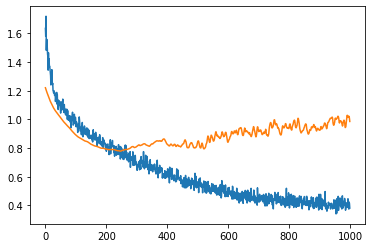

5/5 [==============================] - 0s 3ms/step - loss: 0.6202 - acc: 0.7939
loss= 0.6201736927032471
acc= 0.7938931584358215


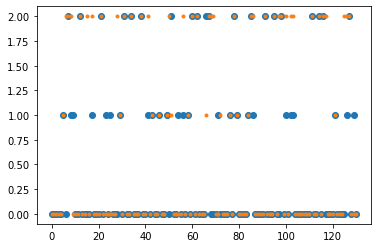

[[76  1  9]
 [ 6 10  9]
 [ 0  2 18]]


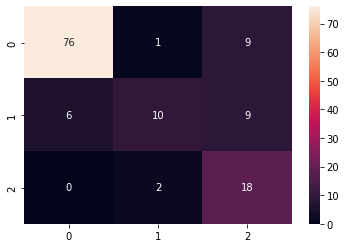

              precision    recall  f1-score   support

           0       0.93      0.88      0.90        86
           1       0.77      0.40      0.53        25
           2       0.50      0.90      0.64        20

    accuracy                           0.79       131
   macro avg       0.73      0.73      0.69       131
weighted avg       0.83      0.79      0.79       131


=========================== 2th K-Fold ==============================



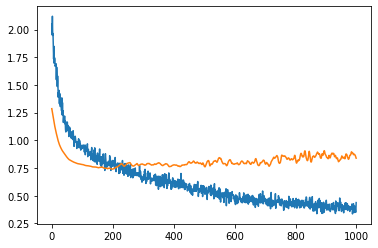

5/5 [==============================] - 0s 3ms/step - loss: 0.6029 - acc: 0.8244
loss= 0.6029425859451294
acc= 0.8244274854660034


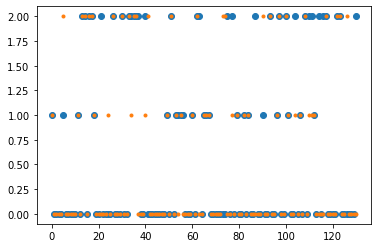

[[73  1  4]
 [ 2 17  2]
 [ 8  6 18]]


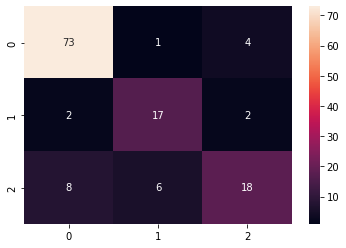

              precision    recall  f1-score   support

           0       0.88      0.94      0.91        78
           1       0.71      0.81      0.76        21
           2       0.75      0.56      0.64        32

    accuracy                           0.82       131
   macro avg       0.78      0.77      0.77       131
weighted avg       0.82      0.82      0.82       131


=========================== 3th K-Fold ==============================



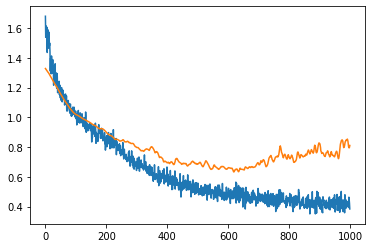

5/5 [==============================] - 0s 3ms/step - loss: 0.6393 - acc: 0.7846
loss= 0.6393072605133057
acc= 0.7846153974533081


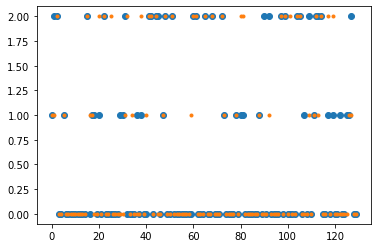

[[74  4  3]
 [ 7  9  6]
 [ 2  6 19]]


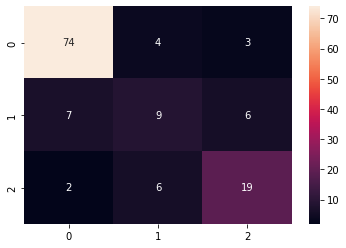

              precision    recall  f1-score   support

           0       0.89      0.91      0.90        81
           1       0.47      0.41      0.44        22
           2       0.68      0.70      0.69        27

    accuracy                           0.78       130
   macro avg       0.68      0.68      0.68       130
weighted avg       0.78      0.78      0.78       130


=========================== Aggregated ==============================

[[223   6  16]
 [ 15  36  17]
 [ 10  14  55]]
              precision    recall  f1-score   support

           0       0.90      0.91      0.90       245
           1       0.64      0.53      0.58        68
           2       0.62      0.70      0.66        79

    accuracy                           0.80       392
   macro avg       0.72      0.71      0.71       392
weighted avg       0.80      0.80      0.80       392



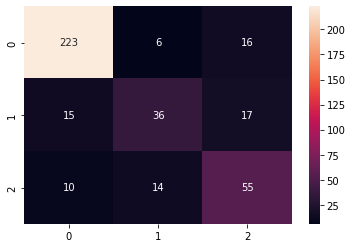

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.regularizers import l2

from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns


all_test_y = []
all_predicted = []

i = 1
for train_index, test_index in KFold(n_splits=3).split(x, y):
    print()
    print(f"=========================== {i}th K-Fold ==============================")
    print()
    i += 1

    train_x, test_x = x[train_index], x[test_index]
    train_y, test_y = y[train_index], y[test_index]




    model = keras.Sequential()
    model.add(Dense(10, activation='relu', input_shape=(7,), kernel_regularizer=l2()))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(10, activation='relu', kernel_regularizer=l2()))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(3, activation="softmax"))

    model.compile(optimizer="Adam", loss="sparse_categorical_crossentropy", metrics=["acc"])
    # model.summary()

    history = model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=128, validation_split=0.1,
                        class_weight=class_weight)

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.show()



    loss, acc = model.evaluate(test_x, test_y)
    print("loss=", loss)
    print("acc=", acc)



    y_ = model.predict(test_x)
    predicted = np.argmax(y_, axis=-1)

    plt.plot(test_y, "o")
    plt.plot(predicted, ".")
    plt.show()


    cm = confusion_matrix(test_y, predicted)
    print(cm)
    sns.heatmap(cm, annot=True, fmt="d")
    plt.show()

    print(classification_report(test_y, predicted))
    all_test_y.extend(test_y)
    all_predicted.extend(predicted)


print()
print(f"=========================== Aggregated ==============================")
print()

cm = confusion_matrix(all_test_y, all_predicted)
print(cm)
plt.show()
sns.heatmap(cm, annot=True, fmt="d")

print(classification_report(all_test_y, all_predicted))    